In [1]:
from models.regex import RegexModel
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface

regex_m = RegexModel()
dataloader = AnnotationDataLoader()
regex_m.predict(["Unknown function", " ", "Not known", "no data", "\n"])


[2, 2, 2, 2, 2]

#####	 Report for Model: regex	

              precision    recall  f1-score   support

           0       1.00      0.42      0.59       306
           1       0.93      0.64      0.76       134
           2       0.93      1.00      0.96      3060

    accuracy                           0.93      3500
   macro avg       0.96      0.69      0.77      3500
weighted avg       0.94      0.93      0.92      3500

The model took 0.16270 seconds to run

Average time per prediction 0.00005 seconds



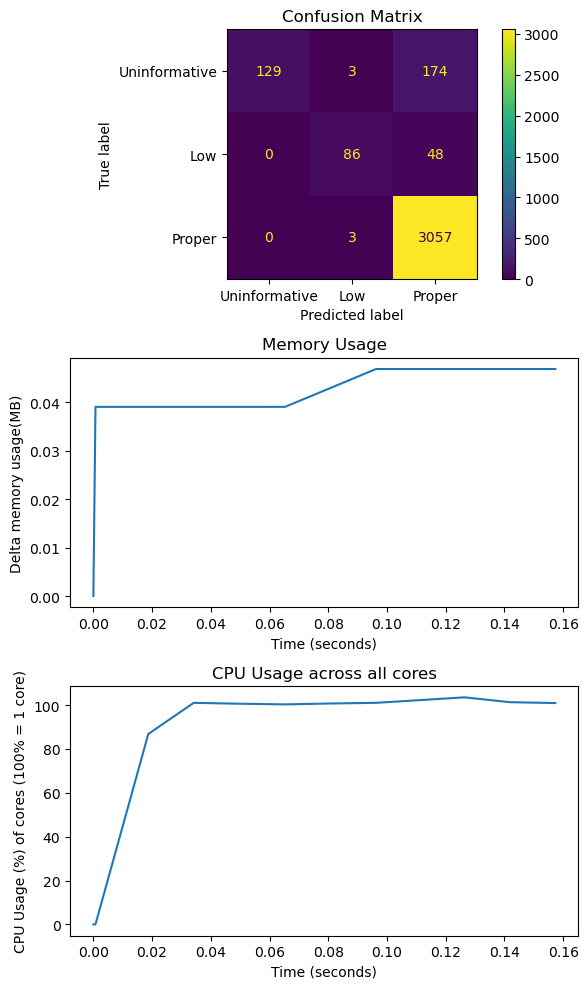

In [2]:
## Evalute model
regex_m_wrapper = ModelEvalWrapper(regex_m, "regex")
m = ModelEvaluator(regex_m_wrapper, dataloader.get_train())

c_report = m.generate_report()
c_report.show_report()


In [3]:
from models.pretrained_embedder.embedder_classifier import EmbedderClassifier
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface


ModuleNotFoundError: No module named 'sentence_transformers'

In [ ]:

embedder_m = EmbedderClassifier()
dataloader = AnnotationDataLoader()

embedder_m.train(dataloader.get_train())

eval_wrapper =  ModelEvalWrapper(embedder_m, "embedder")
m = ModelEvaluator(eval_wrapper, dataloader.get_validation())
c_report = m.generate_report()
c_report.show_report()



In [ ]:
### make the relative imports work in jp
##
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
##
import os
import pandas as pd
from math import isclose
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression


In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
dataloader = AnnotationDataLoader()
train_XY = dataloader.get_train()
embeddings = model.encode(train_XY["X"])
clf = LogisticRegression(max_iter=1000)
clf.fit(embeddings, train_XY["y"])


In [ ]:
eval_XY = dataloader.get_validation()
embeddings = model.encode(eval_XY["X"])
preds = clf.predict(embeddings)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(eval_XY['y'], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [1]:
from models.fine_tuned_BERT_models.classifier import BERTBasedModel
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator

c:\Users\milap\Anaconda\envs\llm_test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
PMB = BERTBasedModel("models/fine_tuned_BERT_models/PMB_model")
dataloader = AnnotationDataLoader()
PMB.predict(["Unknown function", " ", "Not known", "no data", "\n", "DNA transport protein", "known protein function"])

array([0, 0, 0, 0, 0, 2, 1])

#####	 Report for Model: PubMedBERT	

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        44
           1       0.77      0.89      0.83        19
           2       0.98      0.97      0.98       437

    accuracy                           0.96       500
   macro avg       0.87      0.91      0.89       500
weighted avg       0.96      0.96      0.96       500

The model took 3.56341 seconds to run

Average time per prediction 0.00713 seconds



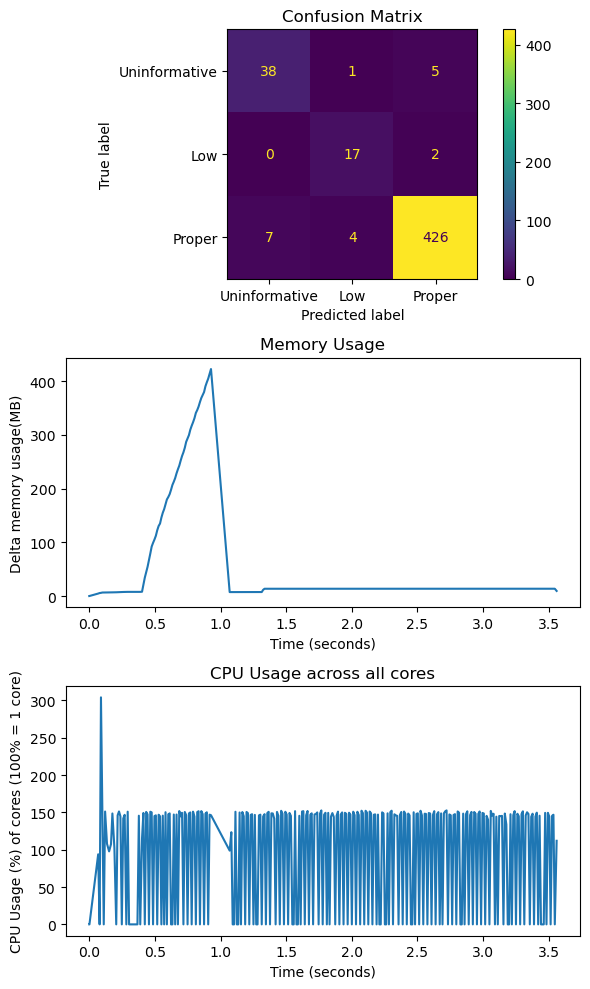

In [4]:
## Evalute model
PMB_m_wrapper = ModelEvalWrapper(PMB, "PubMedBERT")
m = ModelEvaluator(PMB_m_wrapper, dataloader.get_test())
c_report = m.generate_report()
c_report.show_report()